# HR Employee Attrition – Exploratory Data Analysis

## Objective
The goal of this analysis is to explore the HR dataset and understand
patterns and factors that may influence employee attrition.

This notebook focuses on:
- Understanding the structure of the data
- Exploring relationships between features and attrition
- Identifying potential signals useful for predictive modeling

## import all libraries 

In [2]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load data

In [3]:
HR_data = pd.read_csv('../data/HR_attrition_data.csv')
print(HR_data.head())
print(HR_data.info())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

## Initial Observations(from info())
- No missing values are present in the dataset
- The dataset contains both numerical and categorical features
- Categorical features include `salary` and `Department`
- All remaining features are numerical features 

# Pair Plot 
To understand how numerical features relate to employee attrition,
we visualize pairwise relationships using a pairplot.

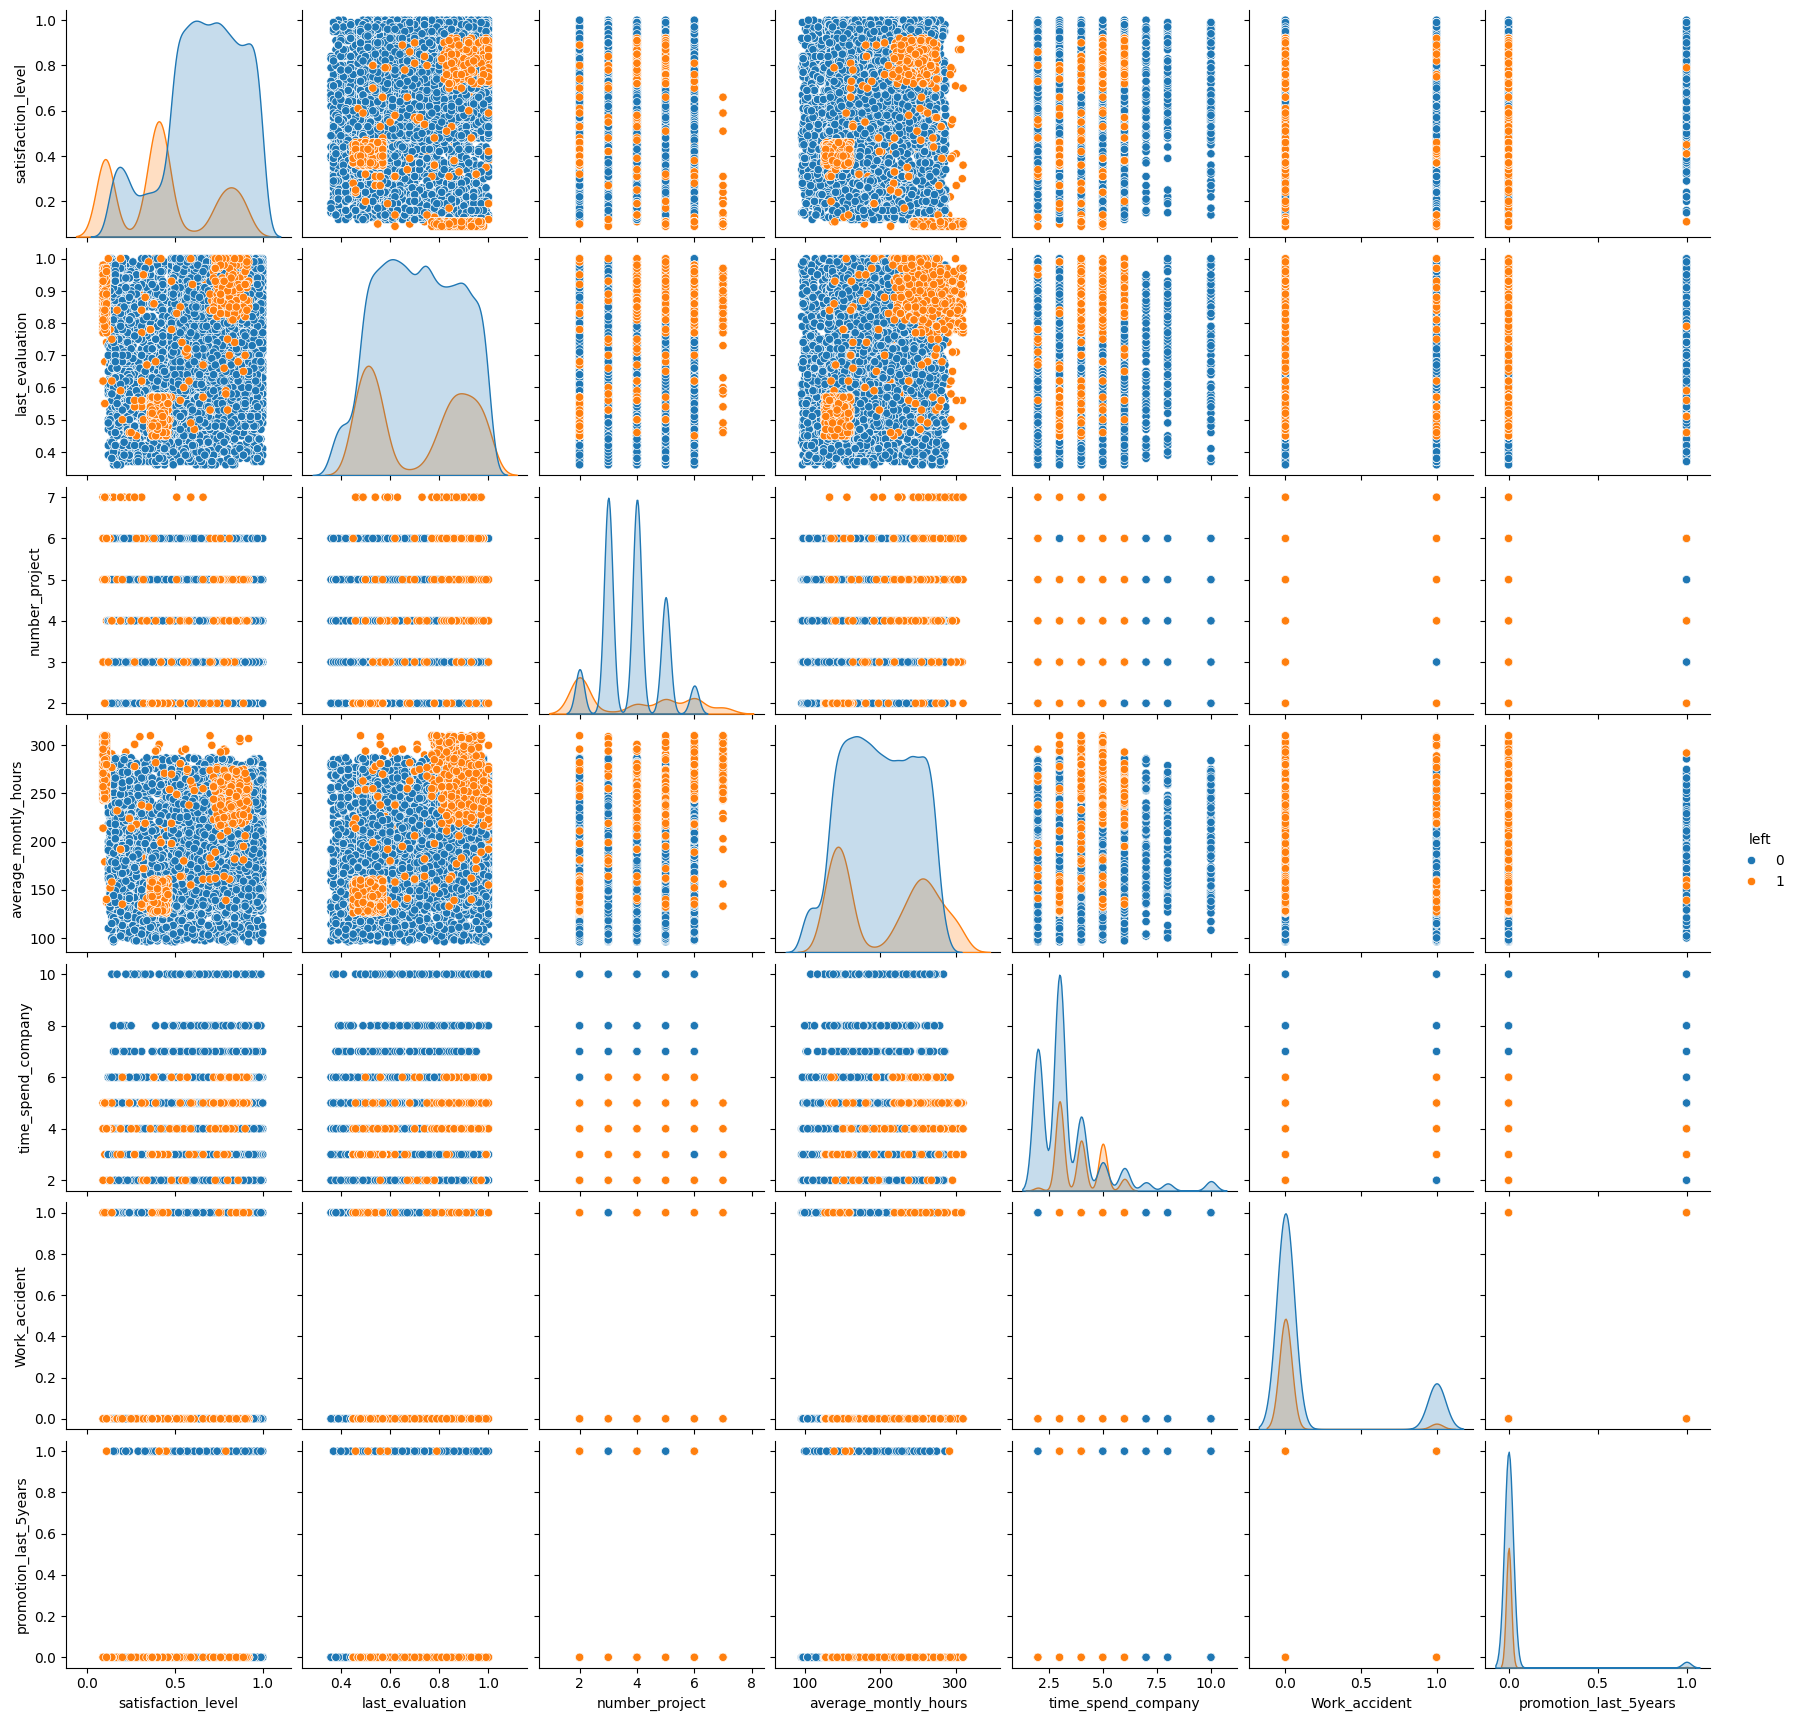

In [4]:
sns.pairplot(HR_data, hue='left')
plt.show()

### Insights from Pairplot
- Employees who left the company tend to have lower satisfaction levels
- Higher average monthly hours appear more frequently among employees who left
- Even though satisfaction level is high, employees with more average_monthly_hours left 
- It is observed that promotion in last 5 years also has significant effect on attrition

## Department-wise Salary Distribution (Employees Who Left)

Department   IT  RandD  accounting   hr  management  marketing  product_mng  \
salary                                                                        
high          4      4           5    6           1          9            6   
low         172     55          99   92          59        126          105   
medium       97     62         100  117          31         68           87   

Department  sales  support  technical  
salary                                 
high           14        8         25  
low           697      389        378  
medium        303      158        294  


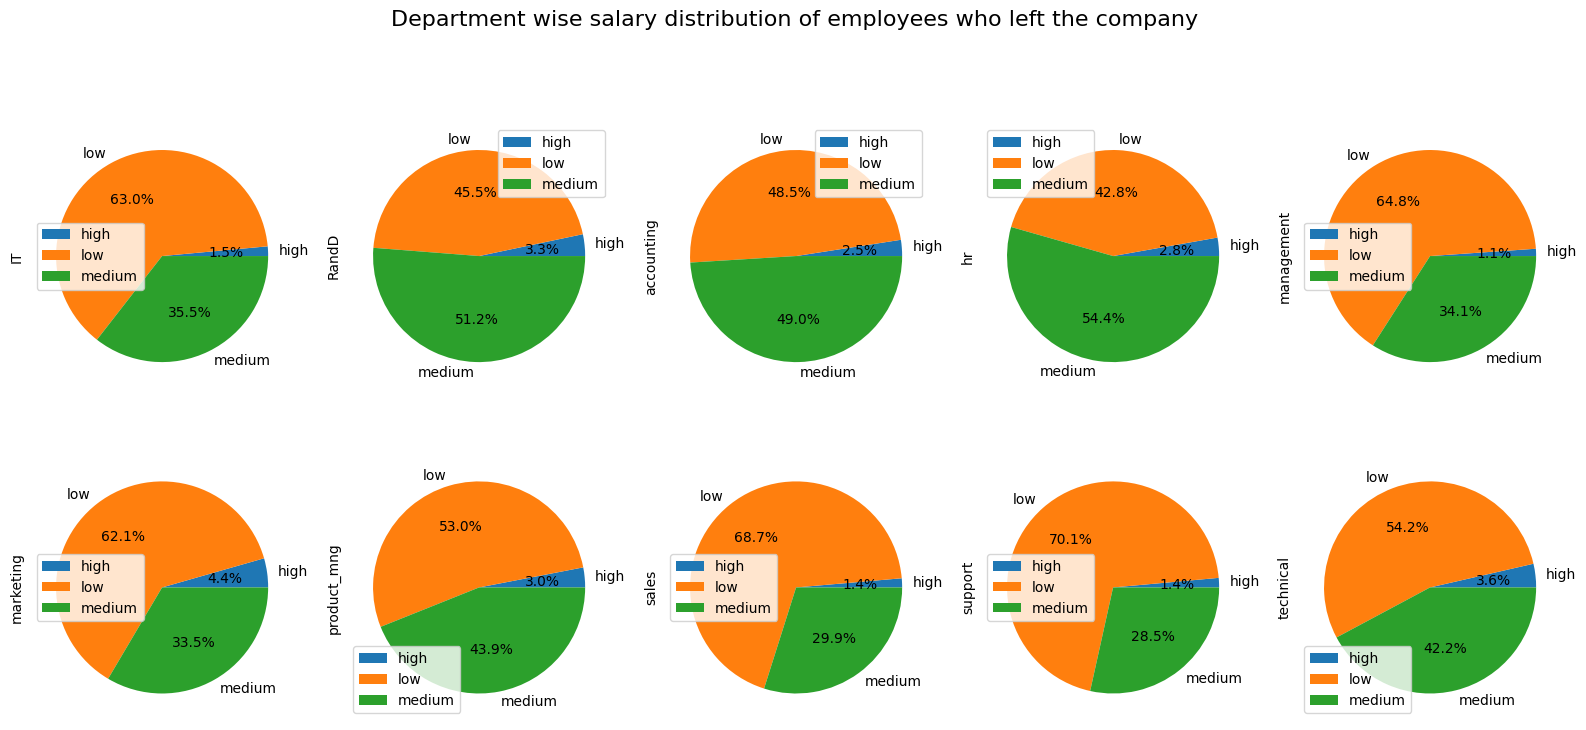

In [5]:
HR_left = HR_data[HR_data['left'] == 1]
grouped_data = HR_left[['salary','Department']].groupby(by=['salary','Department']).size().unstack()
print(grouped_data)
fig,ax = plt.subplots(2,5,figsize=(16,8))
grouped_data.plot.pie(ax=ax,subplots = True, autopct='%1.1f%%', legend = True, fontsize=10)
fig.tight_layout(rect=[0,0,1,0.93])
fig.suptitle('Department wise salary distribution of employees who left the company', fontsize=16)
plt.show()

### Observations
- Most attrition occurs among employees in the low and medium salary ranges
- High salary employees show comparatively lower attrition across departments
- Certain departments exhibit stronger skew toward low-salary attrition

## Salary vs Promotion Analysis
This section explores how salary levels relate to promotion history,
and whether lack of promotion may contribute to employee attrition.

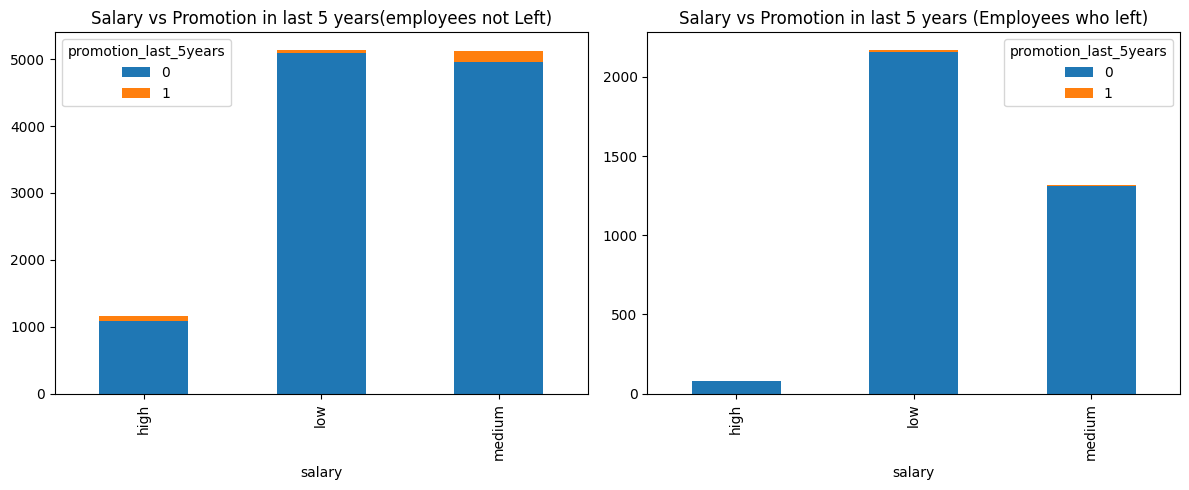

In [8]:
HR_not_left =HR_data[HR_data['left'] == 0]
grouped_data2 = HR_not_left[["salary","promotion_last_5years"]].groupby(by=["salary","promotion_last_5years"]).size().unstack().reset_index()
grouped_data3 = HR_left[["salary","promotion_last_5years"]].groupby(by=["salary","promotion_last_5years"]).size().unstack().reset_index()
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_title('Salary vs Promotion in last 5 years(employees not Left)', fontsize=12)
grouped_data2.plot(x = 'salary', kind='bar',stacked=True,ax = ax[0])
ax[1].set_title('Salary vs Promotion in last 5 years (Employees who left)', fontsize=12)
grouped_data3.plot(x='salary', kind='bar',stacked=True,ax = ax[1])
plt.tight_layout()
plt.show()

### Observations
- Most employees who left belong to the low and medium salary categories
- Employees who did not receive a promotion in the last 5 years
  are more likely to leave the company
- High salary employees show comparatively lower attrition,
  especially when promotions are present

This suggests that limited growth opportunities combined with
lower compensation increase attrition risk.

## Attrition Rate by Department

Text(0.5, 0, 'Attrition Rate')

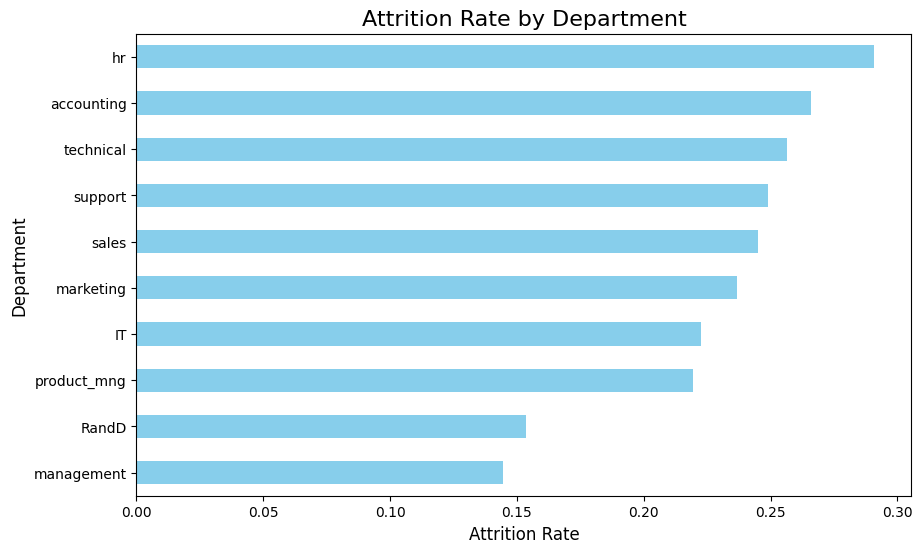

In [30]:
attrition_rate = HR_data.groupby('Department')['left'].mean().sort_values()
plt.figure(figsize=(10,6))
attrition_rate.plot(kind='barh',color='skyblue')
plt.title('Attrition Rate by Department', fontsize=16)
plt.ylabel('Department', fontsize=12)
plt.xlabel('Attrition Rate', fontsize=12)

### Observations
- Attrition rates vary significantly across departments
- Hr departments show high attrition than all other departments
- This suggests that attrition is influenced by department-specific
  factors rather than just employee count

## Satisfaction Level and Employee Attrition

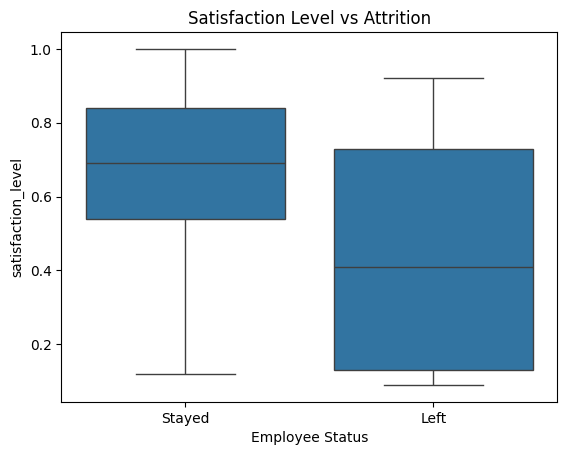

In [31]:
sns.boxplot(x='left', y='satisfaction_level', data=HR_data)
plt.xticks([0,1], ['Stayed', 'Left'])
plt.xlabel("Employee Status")
plt.title("Satisfaction Level vs Attrition")
plt.show()


### Observations
- Employees who left the company have a noticeably lower median satisfaction level compared to those who stayed
- The interquartile range for employees who left is also lower, indicating consistently reduced satisfaction
- This suggests satisfaction level is a strong predictor of attrition

## Workload Distribution by Attrition

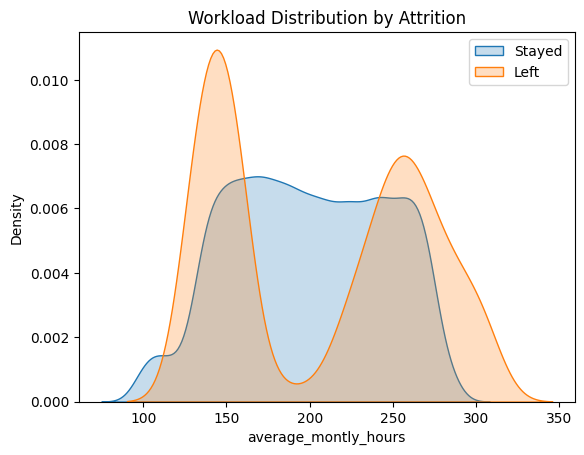

In [35]:
sns.kdeplot(
    HR_data[HR_data['left']==0]['average_montly_hours'],
    label='Stayed', fill=True
)
sns.kdeplot(
    HR_data[HR_data['left']==1]['average_montly_hours'],
    label='Left', fill=True
)

plt.title("Workload Distribution by Attrition")
plt.legend()
plt.show()

### Observations
- Employees who left the company tend to have higher average monthly working hours
- The distribution for employees who left is shifted toward the higher workload range
- This indicates that excessive workload may contribute to employee burnout and attrition

## Overall Conclusions

From the exploratory data analysis, the following key insights emerge:

- Employee satisfaction level is strongly associated with attrition,
  with lower satisfaction observed among employees who left
- Higher workload, measured by average monthly working hours,
  appears to contribute to increased attrition
- Attrition rates vary across departments, indicating that
  organizational and role-specific factors play a role
- Employees with low or medium salaries and limited promotion
  opportunities are more likely to leave the company

Overall, employee attrition is driven by a combination of
workload, satisfaction, compensation, and career growth factors.

These insights will guide feature selection and model design
in the predictive modeling phase of this project.